In [28]:
# set this to your working directory
WORK_DIR = '/home/elliott/Dropbox/_Ash_Teaching/2018-09 - Bocconi - Text Data and ML/code'
import os
os.chdir(WORK_DIR)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_pickle('X.pkl').toarray()
vocab = pd.read_pickle('vocab.pkl')
df1 = pd.read_csv('death-penalty-cases.csv')
Y = df1['citeCount'] > 0
num_features = X.shape[1]

In [2]:
# Set up the basic model
from keras.models import Sequential
from keras.layers import Activation, Dense
model = Sequential()
model.add(Dense(64, input_dim=num_features, activation='relu')) 

Using TensorFlow backend.


In [3]:
# initializers
model.add(Dense(64, kernel_initializer='he_normal'))
model.add(Dense(64, kernel_initializer='he_uniform'))

In [4]:
# other activation functions (https://keras.io/activations/)
model.add(Dense(64, activation="elu"))

In [5]:
# batch normalization
from keras.layers.normalization import BatchNormalization
model.add(Dense(64, use_bias=False)) 
model.add(BatchNormalization())
model.add(Activation('relu'))

In [6]:
# regularization
from keras.regularizers import l1, l2, l1_l2
model.add(Dense(64, 
                kernel_regularizer=l2(0.01),
                activity_regularizer=l1(0.01)))
model.add(Dense(64, 
                kernel_regularizer=l1_l2(l1=0.01,l2=.01),
                activity_regularizer=l1_l2(l1=0.01,l2=.01)))

In [7]:
# Dropout
from keras.layers import Dropout
model.add(Dropout(0.5))

In [8]:
model.add(Dense(1,activation='sigmoid'))

In [9]:
# Optimizers
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Early stopping
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_acc', 
                          min_delta=0.0001, 
                          patience=5, 
                          mode='auto')
model.fit(X, Y, batch_size=128, 
           epochs=100, 
           callbacks=[earlystop], 
           validation_split=0.2)

Train on 26053 samples, validate on 6514 samples
Epoch 1/100
26053/26053 [==============================] - 2s 69us/step - loss: 13.0077 - acc: 0.7862 - val_loss: 4.9180 - val_acc: 0.3753
Epoch 2/100
26053/26053 [==============================] - 1s 35us/step - loss: 5.3955 - acc: 0.8207 - val_loss: 3.8007 - val_acc: 0.3753
Epoch 3/100
26053/26053 [==============================] - 1s 35us/step - loss: 3.8064 - acc: 0.8207 - val_loss: 2.8087 - val_acc: 0.3753
Epoch 4/100
26053/26053 [==============================] - 1s 36us/step - loss: 2.8528 - acc: 0.8207 - val_loss: 2.2671 - val_acc: 0.3753
Epoch 5/100
26053/26053 [==============================] - 1s 36us/step - loss: 2.3365 - acc: 0.8207 - val_loss: 1.9243 - val_acc: 0.3753
Epoch 6/100
26053/26053 [==============================] - 1s 36us/step - loss: 2.0698 - acc: 0.8207 - val_loss: 1.7118 - val_acc: 0.3753


In [11]:
# Batch Training with Large Data
from numpy import memmap
X_mm = memmap('X.pkl',shape=(32567, 472))

model.fit(X_mm, Y, batch_size=128, 
           epochs=3, 
           validation_split=0.2)

Train on 26053 samples, validate on 6514 samples
Epoch 1/3
26053/26053 [==============================] - 1s 35us/step - loss: 1.9889 - acc: 0.8207 - val_loss: 1.6816 - val_acc: 0.3753
Epoch 2/3
26053/26053 [==============================] - 1s 34us/step - loss: 1.8718 - acc: 0.8207 - val_loss: 1.6060 - val_acc: 0.3753
Epoch 3/3
26053/26053 [==============================] - 1s 34us/step - loss: 1.8168 - acc: 0.8207 - val_loss: 1.5789 - val_acc: 0.3753


In [12]:
# Grid search with KerasClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# instantiate KerasClassifier with build function
def create_model(hidden_layers=1):  
    model = Sequential()
    model.add(Dense(16, input_dim=num_features, 
                    activation='relu')) 
    for i in range(hidden_layers):
        model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', 
                optimizer='adam', 
                metrics= ['accuracy'])
    return model
clf = KerasClassifier(create_model)

# set of grid search CV to select number of hidden layers
params = {'hidden_layers' : [0,1,2,3]}
grid = GridSearchCV(clf, param_grid=params)
grid.fit(X,Y)
grid.best_params_

Epoch 1/1
21711/21711 [==============================] - 1s 30us/step
Epoch 1/1
21711/21711 [==============================] - 1s 30us/step
Epoch 1/1
21712/21712 [==============================] - 1s 29us/step
Epoch 1/1
21711/21711 [==============================] - 1s 33us/step
Epoch 1/1
21711/21711 [==============================] - 1s 30us/step
Epoch 1/1
21712/21712 [==============================] - 1s 34us/step
Epoch 1/1
21711/21711 [==============================] - 1s 36us/step
Epoch 1/1
21711/21711 [==============================] - 1s 42us/step
Epoch 1/1
21712/21712 [==============================] - 1s 33us/step
Epoch 1/1
21711/21711 [==============================] - 1s 38us/step
Epoch 1/1
21711/21711 [==============================] - 1s 35us/step
Epoch 1/1
21712/21712 [==============================] - 1s 36us/step
Epoch 1/1
32567/32567 [==============================] - 3s 102us/step - loss: 0.5047 - acc: 0.7611


{'hidden_layers': 1}

In [16]:
######
# Convolutional Neural Networks
#######

# Prep data as word sequences
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
num_words = 100 # use 20,000 in practice
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(df1['snippet'])
id2word = {v-1:k for k, v in tokenizer.word_index.items() if v <= 100}
sequences = tokenizer.texts_to_sequences(df1['snippet'])
print(sequences[:2])

[[7, 37, 6, 4, 2, 3, 1, 16, 4, 8, 16, 4, 1, 2, 3, 1, 16, 13, 33, 1, 30, 85, 1, 13, 12, 1, 2, 3, 35, 13, 4, 1, 9, 21, 1, 62, 7, 5, 1, 2, 3, 8, 1, 23, 1, 23, 27, 26, 59, 1, 9, 1, 2, 3, 27, 12, 19, 26, 35, 14, 12, 10], [56, 1, 2, 3, 13, 86, 8, 56, 95, 2, 3, 20, 1, 2, 3, 20, 9, 89, 5, 1, 2, 3, 20, 7, 6, 87, 1, 2, 3, 97, 2, 3, 40, 6, 6, 87, 7, 17, 2, 3, 75, 12, 7, 2, 3, 4, 8, 11, 24, 28, 8, 4, 1, 2, 3, 6, 30, 8]]


In [17]:
# Represent data as one-hot encoded vectors
from keras.preprocessing.sequence import pad_sequences
maxlen = max([len(sent) for sent in sequences]) 
X = pad_sequences(sequences, maxlen=maxlen)
Xhot = to_categorical(X)
Xhot

array([[[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

       ..., 
       [[ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0., 

In [21]:
# Build Model
from keras.layers import Conv1D, GlobalMaxPooling1D
model = Sequential()
model.add(Conv1D(input_shape=(82,100),
                 filters=250, 
                 kernel_size=3)) # trigrams
model.add(GlobalMaxPooling1D())
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 80, 250)           75250     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 250)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 25)                6275      
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 26        
Total params: 81,551
Trainable params: 81,551
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(Xhot, Y, epochs=5)

Epoch 1/5
32567/32567 [==============================] - 6s 186us/step - loss: 0.4938 - acc: 0.7637
Epoch 2/5
32567/32567 [==============================] - 5s 159us/step - loss: 0.4349 - acc: 0.7932
Epoch 3/5
32567/32567 [==============================] - 5s 155us/step - loss: 0.3902 - acc: 0.8199
Epoch 4/5
32567/32567 [==============================] - 5s 149us/step - loss: 0.3430 - acc: 0.8453
Epoch 5/5
32567/32567 [==============================] - 5s 149us/step - loss: 0.2944 - acc: 0.8687


In [23]:
# weights on first trigram filter
first_filter = model.get_weights()[0][:,:,0]
first_filter.shape

(3, 100)

In [26]:
# highest activating trigram
trigram = np.argmax(np.abs(first_filter),axis=1)
' '.join([id2word[i] for i in trigram])

'evidence see first'

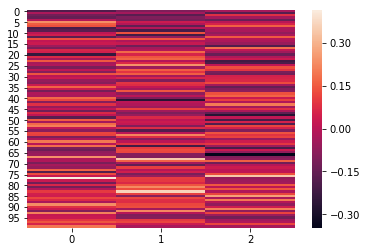

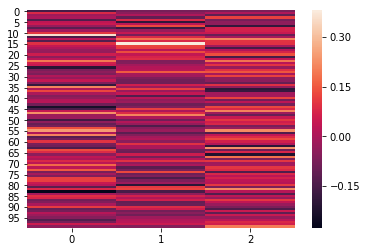

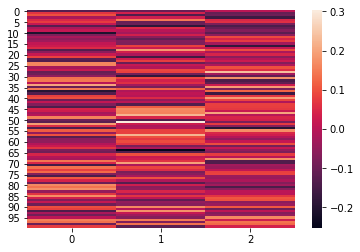

In [29]:
# heatmap for filters
from seaborn import heatmap
for i in range(3):
    heatmap(model.get_weights()[0][:,:,i].T)
    plt.show()

In [30]:
# Autoencoder
from keras.layers import Input
data_dims = X.shape[1]
input_img = Input(shape=(data_dims,)) # input placeholder

# encoded: the compressed representation
encoded = Dense(32, activation='relu')(input_img)
# decoded: the lossy reconstruction
decoded = Dense(data_dims, activation='sigmoid')(encoded)

from keras.models import Model
autoencoder = Model(input_img, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 472)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)                15136     
_________________________________________________________________
dense_59 (Dense)             (None, 472)               15576     
Total params: 30,712
Trainable params: 30,712
Non-trainable params: 0
_________________________________________________________________


In [31]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Fit and validate
autoencoder.fit(X, X,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_split=.2)

Train on 26053 samples, validate on 6514 samples
Epoch 1/10
26053/26053 [==============================] - 1s 45us/step - loss: 0.6344 - val_loss: 0.5107
Epoch 2/10
26053/26053 [==============================] - 1s 20us/step - loss: 0.2959 - val_loss: 0.2093
Epoch 3/10
26053/26053 [==============================] - 1s 20us/step - loss: 0.1947 - val_loss: 0.1640
Epoch 4/10
26053/26053 [==============================] - 0s 19us/step - loss: 0.1779 - val_loss: 0.1478
Epoch 5/10
26053/26053 [==============================] - 0s 19us/step - loss: 0.1677 - val_loss: 0.1365
Epoch 6/10
26053/26053 [==============================] - 0s 19us/step - loss: 0.1588 - val_loss: 0.1275
Epoch 7/10
26053/26053 [==============================] - 1s 19us/step - loss: 0.1508 - val_loss: 0.1189
Epoch 8/10
26053/26053 [==============================] - 1s 20us/step - loss: 0.1434 - val_loss: 0.1106
Epoch 9/10
26053/26053 [==============================] - 1s 21us/step - loss: 0.1366 - val_loss: 0.1027
Epoch 

In [45]:
Xpred = autoencoder.predict(X)
list(zip(X[178][:10], Xpred[178][:10]))

[(0, 0.015637064),
 (0, 0.04920432),
 (0, 0.01552498),
 (0, 0.0090448726),
 (0, 0.025892973),
 (0, 0.01405709),
 (0, 0.031077221),
 (0, 0.021898394),
 (0, 0.024592455),
 (3, 0.020910749)]

In [47]:
# Dimension reduction using autoencoder
encoder = Model(input_img, encoded)
X32 = encoder.predict(X)
X32[:2]

array([[ 0.11267956,  2.61195922,  0.        ,  0.30709952,  3.33018064,
         0.        ,  1.05446982,  1.68811417,  0.41522232,  2.36132598,
         1.51298428,  1.28733015,  2.04268122,  2.14705181,  0.20842591,
         1.4303124 ,  1.23065948,  1.65198255,  0.90758121,  0.37303638,
         2.97877026,  2.20921946,  0.38581687,  2.13093114,  1.9217484 ,
         1.04927194,  2.70666337,  0.76855296,  0.        ,  2.64639664,
         1.02973294,  1.74879789],
       [ 0.52734804,  1.36887419,  0.        ,  0.45910767,  3.49829888,
         0.67846024,  0.89417028,  2.0709703 ,  0.87651092,  2.45137954,
         1.72468925,  1.7225033 ,  2.73024678,  2.16357422,  0.2949608 ,
         0.03829849,  0.42580903,  2.59655023,  1.7256732 ,  1.00549853,
         3.35043716,  1.1858747 ,  0.39655784,  0.79530638,  1.01324403,
         2.06913638,  2.23793149,  0.83604223,  0.        ,  2.07728267,
         0.466461  ,  0.6884855 ]], dtype=float32)